# Calculate distance to cell center for every pixel

In [1]:
import numpy as np
import pandas as pd
import scipy
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm, trange
from joblib import Parallel, delayed
import os
import sys
import pickle

### Directories and inputs

In [2]:
# Import path
module_path = str(Path.cwd().parents[0])
if module_path not in sys.path:
    sys.path.append(module_path)

module_path = str(Path.cwd().parents[0] / "src")
if module_path not in sys.path:
    sys.path.append(module_path)

In [3]:
from config import *

In [4]:
# dataframes of interest:
pickle_name_temp = f"{data_path_masked_BM}/images_all_BM.pickle"
images_all_BM = pickle.load(open(pickle_name_temp, "rb"))
pickle_name_temp = f"{data_path_masked_UC}/images_all_UC.pickle"
images_all_UC = pickle.load(open(pickle_name_temp, "rb"))

In [6]:
# Figures location    
save_path = f"{data_figure}/ksTest/"
if not os.path.exists(save_path):
    os.makedirs(save_path)

### spatial coords = index_i and index_j

In [7]:
# spatial coords are index_i and index_j
idCols = ['cell', 'index_i', 'index_j']

### Compute cell center and distance by cell for BM cells

In [8]:
# compute cell center and distance by cell for BM cells
def calcDist(px, center, pts):
    d = np.linalg.norm(pts[px, :] - center)
    
    return d

distCenter = pd.DataFrame(columns = ['DistCenter'])

for ii, c in enumerate(tqdm(images_all_BM['cell'].drop_duplicates())):
    
    dfCell = images_all_BM.loc[images_all_BM['cell'] == c]
    
    # compute cell center
    center = dfCell[idCols]
    center = dfCell.groupby(['cell']).mean() # avg XY coords
    center = center[['index_i', 'index_j']].values 
    
    pts = dfCell[['index_i', 'index_j']].values
    
    dists = Parallel(n_jobs = -1, prefer = 'threads', verbose = 3)\
        (delayed(calcDist)(p, center, pts) for p in range(pts.shape[0]))

    dfDist = pd.DataFrame()
    dfDist['DistCenter'] = dists
    dfDist.index = dfCell.index
    
    distCenter = pd.concat([distCenter, dfDist])
    
    
# merge back with original DF
images_all_BM = images_all_BM.merge(distCenter, how = 'outer', \
                                    left_index = True, \
                                        right_index = True)

  0%|                                                                                            | 0/7 [00:00<?, ?it/s][Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 496 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 1136 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 1552 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 2032 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 2576 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 3184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 3856 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 4592 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 5392 tasks      | ela

[Parallel(n_jobs=-1)]: Done 143632 tasks      | elapsed:    7.8s
[Parallel(n_jobs=-1)]: Done 147952 tasks      | elapsed:    8.1s
[Parallel(n_jobs=-1)]: Done 152336 tasks      | elapsed:    8.3s
[Parallel(n_jobs=-1)]: Done 156784 tasks      | elapsed:    8.6s
[Parallel(n_jobs=-1)]: Done 161296 tasks      | elapsed:    8.8s
[Parallel(n_jobs=-1)]: Done 165872 tasks      | elapsed:    9.1s
[Parallel(n_jobs=-1)]: Done 170512 tasks      | elapsed:    9.4s
[Parallel(n_jobs=-1)]: Done 175216 tasks      | elapsed:    9.6s
[Parallel(n_jobs=-1)]: Done 179984 tasks      | elapsed:    9.9s
[Parallel(n_jobs=-1)]: Done 184816 tasks      | elapsed:   10.1s
[Parallel(n_jobs=-1)]: Done 189712 tasks      | elapsed:   10.4s
[Parallel(n_jobs=-1)]: Done 194672 tasks      | elapsed:   10.7s
[Parallel(n_jobs=-1)]: Done 199696 tasks      | elapsed:   11.0s
[Parallel(n_jobs=-1)]: Done 204784 tasks      | elapsed:   11.2s
[Parallel(n_jobs=-1)]: Done 209936 tasks      | elapsed:   11.5s
[Parallel(n_jobs=-1)]: Do

[Parallel(n_jobs=-1)]: Done 143632 tasks      | elapsed:    7.9s
[Parallel(n_jobs=-1)]: Done 147952 tasks      | elapsed:    8.1s
[Parallel(n_jobs=-1)]: Done 152336 tasks      | elapsed:    8.3s
[Parallel(n_jobs=-1)]: Done 156784 tasks      | elapsed:    8.6s
[Parallel(n_jobs=-1)]: Done 161296 tasks      | elapsed:    8.8s
[Parallel(n_jobs=-1)]: Done 165872 tasks      | elapsed:    9.1s
[Parallel(n_jobs=-1)]: Done 170512 tasks      | elapsed:    9.3s
[Parallel(n_jobs=-1)]: Done 175216 tasks      | elapsed:    9.6s
[Parallel(n_jobs=-1)]: Done 179984 tasks      | elapsed:    9.9s
[Parallel(n_jobs=-1)]: Done 184816 tasks      | elapsed:   10.1s
[Parallel(n_jobs=-1)]: Done 189712 tasks      | elapsed:   10.4s
[Parallel(n_jobs=-1)]: Done 194672 tasks      | elapsed:   10.7s
[Parallel(n_jobs=-1)]: Done 199696 tasks      | elapsed:   11.0s
[Parallel(n_jobs=-1)]: Done 204784 tasks      | elapsed:   11.2s
[Parallel(n_jobs=-1)]: Done 209936 tasks      | elapsed:   11.5s
[Parallel(n_jobs=-1)]: Do

[Parallel(n_jobs=-1)]: Done 3856 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 4592 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 5392 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 6256 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 7184 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 8176 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 9232 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 10352 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 11536 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 12784 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 14096 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 15472 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 16912 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 18416 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 19984 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 21616 tasks      | 

[Parallel(n_jobs=-1)]: Done 170512 tasks      | elapsed:    9.2s
[Parallel(n_jobs=-1)]: Done 175216 tasks      | elapsed:    9.5s
[Parallel(n_jobs=-1)]: Done 179984 tasks      | elapsed:    9.8s
[Parallel(n_jobs=-1)]: Done 184816 tasks      | elapsed:   10.1s
[Parallel(n_jobs=-1)]: Done 189712 tasks      | elapsed:   10.3s
[Parallel(n_jobs=-1)]: Done 194672 tasks      | elapsed:   10.6s
[Parallel(n_jobs=-1)]: Done 199696 tasks      | elapsed:   10.9s
[Parallel(n_jobs=-1)]: Done 204784 tasks      | elapsed:   11.1s
[Parallel(n_jobs=-1)]: Done 209936 tasks      | elapsed:   11.4s
[Parallel(n_jobs=-1)]: Done 215152 tasks      | elapsed:   11.7s
[Parallel(n_jobs=-1)]: Done 220432 tasks      | elapsed:   12.0s
[Parallel(n_jobs=-1)]: Done 225776 tasks      | elapsed:   12.3s
[Parallel(n_jobs=-1)]: Done 231184 tasks      | elapsed:   12.6s
[Parallel(n_jobs=-1)]: Done 236656 tasks      | elapsed:   12.9s
[Parallel(n_jobs=-1)]: Done 242192 tasks      | elapsed:   13.2s
[Parallel(n_jobs=-1)]: Do

In [9]:
images_all_BM

,ATF6,BetaTubulin,ConcanavalinA,DAPI,GOLPH4,HSP60,Nucleolin,Phalloidin,Sortilin,TOM20,...,cell,index_i,index_j,mitochondria,endoplasmic_reticulum,nucleus,golgi,plasma_membrane,CellType,DistCenter
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.509696,0.000000,0.000000,...,0,0.0,5.0,0.000000,0.000000,0.000000,0.000000,3.598631,BM,324.134783
200,9.770940,12.318942,0.501044,8.657754,5.336016,3.606301,0.673850,4.644672,0.000000,1.212075,...,6,0.0,200.0,4.371108,4.895673,5.834025,4.009684,0.751438,BM,394.203894
201,6.191183,13.231277,0.976312,7.822435,8.481898,2.895960,0.488402,9.289345,0.000000,2.984557,...,6,0.0,201.0,8.643159,6.044528,3.820489,23.436159,2.763080,BM,393.602389
202,7.384435,15.968281,0.840521,7.404775,0.000000,1.170849,1.230194,4.371456,0.000000,2.662288,...,6,0.0,202.0,3.117136,6.206776,9.109311,0.000000,3.080707,BM,393.002508
203,16.134951,9.125770,0.568940,3.645837,5.199238,1.475280,0.488402,2.732160,0.000000,5.240443,...,6,0.0,203.0,7.731122,9.179814,1.780632,11.613540,2.233700,BM,392.404258
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1052898,0.497858,6.325273,8.211070,15.903793,14.811521,14.225857,0.000000,25.668574,7.530286,13.397283,...,1,946.0,946.0,190.587828,4.087943,0.000000,190.174584,12.839640,BM,657.435049
1052899,8.663402,7.205269,15.586685,1.208386,14.242380,16.775277,0.000000,17.378253,8.206062,4.673471,...,1,946.0,947.0,78.398766,135.033723,0.000000,157.206445,11.037933,BM,658.059365
1052900,5.368533,6.985270,25.027474,0.000000,8.677453,12.288298,0.000000,16.017156,6.498839,0.311565,...,1,946.0,948.0,3.828600,134.360824,0.000000,107.380730,12.374683,BM,658.684608
1054011,7.947126,3.575286,26.207572,8.556089,14.432094,17.998999,0.000000,16.759573,8.704002,5.608165,...,1,947.0,947.0,100.941352,208.274885,0.000000,190.335601,13.188357,BM,658.840463


### Compute cell center and distance by cell for UC cells

In [10]:
# calculate cell center and distance by cell for UC cells
def calcDist(px, center, pts):
    d = np.linalg.norm(pts[px, :] - center)
    
    return d

distCenter = pd.DataFrame(columns = ['DistCenter'])


for ii, c in enumerate(tqdm(images_all_UC['cell'].drop_duplicates())):
    
    dfCell = images_all_UC.loc[images_all_UC['cell'] == c]
    
    # compute cell center
    center = dfCell[idCols]
    center = dfCell.groupby(['cell']).mean() # avg XY coords
    center = center[['index_i', 'index_j']].values 
    
    pts = dfCell[['index_i', 'index_j']].values
    
    dists = Parallel(n_jobs = -1, prefer = 'threads', verbose = 3)\
        (delayed(calcDist)(p, center, pts) for p in range(pts.shape[0]))

    dfDist = pd.DataFrame()
    dfDist['DistCenter'] = dists
    dfDist.index = dfCell.index
    
    distCenter = pd.concat([distCenter, dfDist])
    

# merge back with original DF
images_all_UC = images_all_UC.merge(distCenter, how = 'outer', \
                                    left_index = True, \
                                        right_index = True)


  0%|                                                                                            | 0/7 [00:00<?, ?it/s][Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 496 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 1136 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 1552 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 2032 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 2576 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 3184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 3856 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 4592 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 5392 tasks      | ela

[Parallel(n_jobs=-1)]: Done 3856 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 4592 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 5392 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 6256 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 7184 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 8176 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 9232 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 10352 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 11536 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 12784 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 14096 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 15472 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 16912 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 18416 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 19984 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 21616 tasks      | 

[Parallel(n_jobs=-1)]: Done 609392 tasks      | elapsed:   33.4s
[Parallel(n_jobs=-1)]: Done 618256 tasks      | elapsed:   33.9s
[Parallel(n_jobs=-1)]: Done 627184 tasks      | elapsed:   34.4s
[Parallel(n_jobs=-1)]: Done 636176 tasks      | elapsed:   34.9s
[Parallel(n_jobs=-1)]: Done 645232 tasks      | elapsed:   35.4s
[Parallel(n_jobs=-1)]: Done 654352 tasks      | elapsed:   35.9s
[Parallel(n_jobs=-1)]: Done 663536 tasks      | elapsed:   36.4s
[Parallel(n_jobs=-1)]: Done 672784 tasks      | elapsed:   36.9s
[Parallel(n_jobs=-1)]: Done 682096 tasks      | elapsed:   37.4s
[Parallel(n_jobs=-1)]: Done 691472 tasks      | elapsed:   37.9s
[Parallel(n_jobs=-1)]: Done 700912 tasks      | elapsed:   38.4s
[Parallel(n_jobs=-1)]: Done 710416 tasks      | elapsed:   39.0s
[Parallel(n_jobs=-1)]: Done 719984 tasks      | elapsed:   39.5s
[Parallel(n_jobs=-1)]: Done 729616 tasks      | elapsed:   40.0s
[Parallel(n_jobs=-1)]: Done 739312 tasks      | elapsed:   40.5s
[Parallel(n_jobs=-1)]: Do

[Parallel(n_jobs=-1)]: Done 4592 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 5392 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 6256 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 7184 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 8176 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 9232 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 10352 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 11536 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 12784 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 14096 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 15472 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 16912 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 18416 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 19984 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 21616 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 23312 tasks      |

[Parallel(n_jobs=-1)]: Done 111376 tasks      | elapsed:    6.2s
[Parallel(n_jobs=-1)]: Done 115184 tasks      | elapsed:    6.4s
[Parallel(n_jobs=-1)]: Done 119056 tasks      | elapsed:    6.6s
[Parallel(n_jobs=-1)]: Done 122992 tasks      | elapsed:    6.8s
[Parallel(n_jobs=-1)]: Done 126992 tasks      | elapsed:    7.0s
[Parallel(n_jobs=-1)]: Done 131056 tasks      | elapsed:    7.3s
[Parallel(n_jobs=-1)]: Done 135184 tasks      | elapsed:    7.5s
[Parallel(n_jobs=-1)]: Done 139376 tasks      | elapsed:    7.7s
[Parallel(n_jobs=-1)]: Done 143632 tasks      | elapsed:    8.0s
[Parallel(n_jobs=-1)]: Done 147952 tasks      | elapsed:    8.2s
[Parallel(n_jobs=-1)]: Done 152336 tasks      | elapsed:    8.5s
[Parallel(n_jobs=-1)]: Done 156784 tasks      | elapsed:    8.7s
[Parallel(n_jobs=-1)]: Done 161296 tasks      | elapsed:    8.9s
[Parallel(n_jobs=-1)]: Done 165872 tasks      | elapsed:    9.2s
[Parallel(n_jobs=-1)]: Done 170512 tasks      | elapsed:    9.5s
[Parallel(n_jobs=-1)]: Do

[Parallel(n_jobs=-1)]: Done 119056 tasks      | elapsed:    6.6s
[Parallel(n_jobs=-1)]: Done 122992 tasks      | elapsed:    6.8s
[Parallel(n_jobs=-1)]: Done 126992 tasks      | elapsed:    7.1s
[Parallel(n_jobs=-1)]: Done 131056 tasks      | elapsed:    7.3s
[Parallel(n_jobs=-1)]: Done 135184 tasks      | elapsed:    7.5s
[Parallel(n_jobs=-1)]: Done 139376 tasks      | elapsed:    7.8s
[Parallel(n_jobs=-1)]: Done 143632 tasks      | elapsed:    8.0s
[Parallel(n_jobs=-1)]: Done 147952 tasks      | elapsed:    8.3s
[Parallel(n_jobs=-1)]: Done 152336 tasks      | elapsed:    8.5s
[Parallel(n_jobs=-1)]: Done 156784 tasks      | elapsed:    8.7s
[Parallel(n_jobs=-1)]: Done 161296 tasks      | elapsed:    9.0s
[Parallel(n_jobs=-1)]: Done 165872 tasks      | elapsed:    9.3s
[Parallel(n_jobs=-1)]: Done 170512 tasks      | elapsed:    9.5s
[Parallel(n_jobs=-1)]: Done 175216 tasks      | elapsed:    9.8s
[Parallel(n_jobs=-1)]: Done 179984 tasks      | elapsed:   10.1s
[Parallel(n_jobs=-1)]: Do

[Parallel(n_jobs=-1)]: Done 301072 tasks      | elapsed:   16.5s
[Parallel(n_jobs=-1)]: Done 307312 tasks      | elapsed:   16.9s
[Parallel(n_jobs=-1)]: Done 313616 tasks      | elapsed:   17.3s
[Parallel(n_jobs=-1)]: Done 319984 tasks      | elapsed:   17.6s
[Parallel(n_jobs=-1)]: Done 326416 tasks      | elapsed:   18.0s
[Parallel(n_jobs=-1)]: Done 332912 tasks      | elapsed:   18.3s
[Parallel(n_jobs=-1)]: Done 339472 tasks      | elapsed:   18.7s
[Parallel(n_jobs=-1)]: Done 346096 tasks      | elapsed:   19.0s
[Parallel(n_jobs=-1)]: Done 352784 tasks      | elapsed:   19.4s
[Parallel(n_jobs=-1)]: Done 359536 tasks      | elapsed:   19.8s
[Parallel(n_jobs=-1)]: Done 366352 tasks      | elapsed:   20.2s
[Parallel(n_jobs=-1)]: Done 373232 tasks      | elapsed:   20.5s
[Parallel(n_jobs=-1)]: Done 380176 tasks      | elapsed:   20.9s
[Parallel(n_jobs=-1)]: Done 387184 tasks      | elapsed:   21.3s
[Parallel(n_jobs=-1)]: Done 394256 tasks      | elapsed:   21.7s
[Parallel(n_jobs=-1)]: Do

In [11]:
images_all_UC

,ATF6,BetaTubulin,ConcanavalinA,DAPI,GOLPH4,HSP60,Nucleolin,Phalloidin,Sortilin,TOM20,...,cell,index_i,index_j,mitochondria,endoplasmic_reticulum,nucleus,golgi,plasma_membrane,CellType,DistCenter
160,15.621568,13.643643,25.104201,4.070347,7.921341,2.786860,16.837530,0.623472,4.617848,1.362346,...,5,0.0,160.0,3.796668,392.166978,68.534586,62.901574,7.940773,UC,304.200256
161,8.355722,0.000000,12.724047,0.000000,7.561280,3.455707,10.714792,3.740831,18.051589,1.816461,...,5,0.0,161.0,6.277158,106.318604,0.000000,42.252067,5.587952,UC,303.541205
162,5.812676,12.594132,0.000000,3.591483,5.760975,2.452437,9.949449,57.982885,0.000000,19.526960,...,5,0.0,162.0,47.888642,0.000000,35.733273,25.414777,4.411541,UC,302.884022
163,3.996215,11.019866,0.000000,2.394322,1.440244,3.121284,6.505409,15.586797,13.433741,36.783342,...,5,0.0,163.0,114.811247,0.000000,15.576042,17.366765,12.058212,UC,302.228718
164,10.898768,15.742665,0.000000,3.830915,3.600610,2.563912,10.332120,23.068460,24.348655,11.352883,...,5,0.0,164.0,29.107790,0.000000,39.581472,7.412643,2.058719,UC,301.575307
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2598037,17.934549,13.806228,20.171148,1.256827,10.040826,71.457191,4.161165,51.516830,15.481429,4.343862,...,1,1268.0,1173.0,310.400207,361.760433,5.229866,132.014815,13.147804,UC,619.555186
2598038,19.869127,15.034263,14.996831,2.281838,8.052514,77.209101,4.388137,46.331436,12.549142,7.305336,...,1,1268.0,1174.0,564.038399,297.973933,10.013016,135.294381,16.801509,UC,619.732559
2598039,18.210917,22.811817,15.909945,3.534628,7.229763,76.884634,5.447343,19.606713,1.797424,6.268820,...,1,1268.0,1175.0,481.975936,289.734700,19.254329,105.461588,14.587142,UC,619.911495
2598040,13.236288,37.343563,19.714590,1.826277,9.629451,74.819846,6.884836,33.567389,7.661997,5.824599,...,1,1268.0,1176.0,435.795604,260.947994,12.573621,154.326217,16.026481,UC,620.091992


### Calculate pairwise markers w/in cell to validate 

In [12]:
def add_value_labels(ax, label, spacing):
    """Add labels to the end of each bar in a bar chart.

    Arguments:
        ax (matplotlib.axes.Axes): The matplotlib object containing the axes
            of the plot to annotate.
        spacing (int): The distance between the labels and the bars.
    """

    # For each bar: Place a label
    for ii, rect in enumerate(ax.patches):
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = spacing
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Create annotation
        ax.annotate(
            label[ii],                  # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)                      # Vertically align label differently for
                                        # positive and negative values.

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:18<00:00,  2.71s/it]


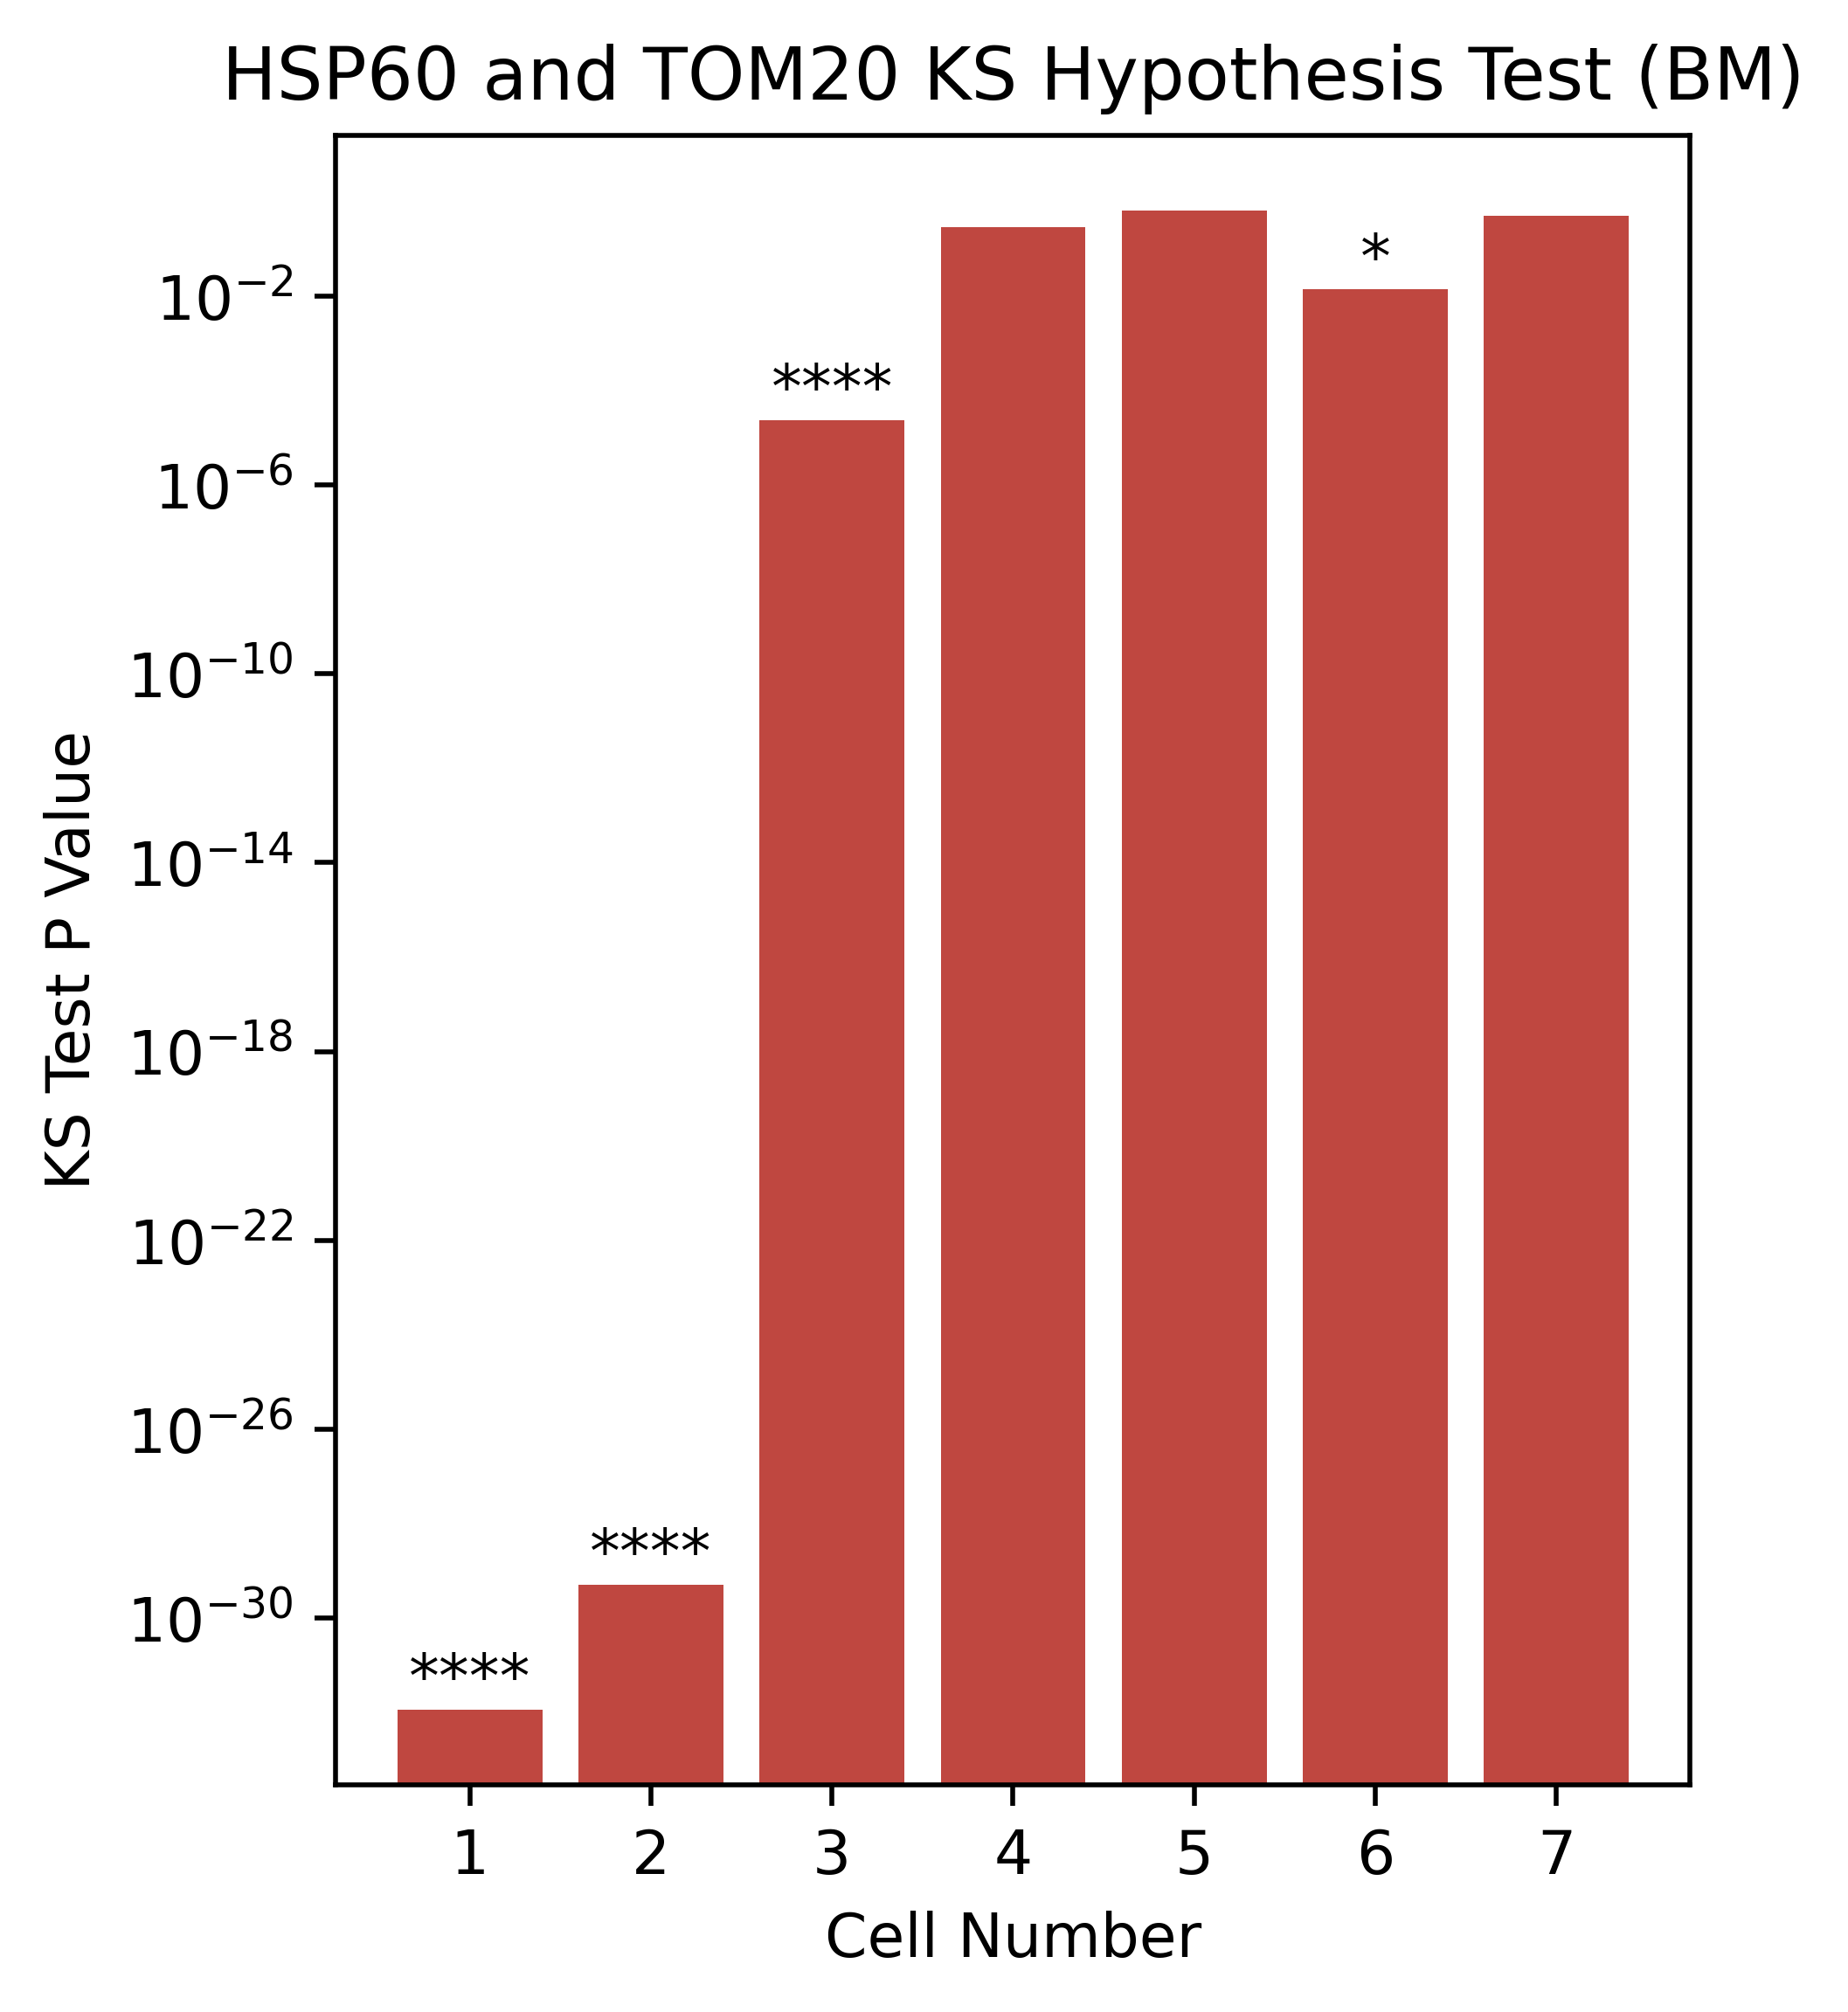

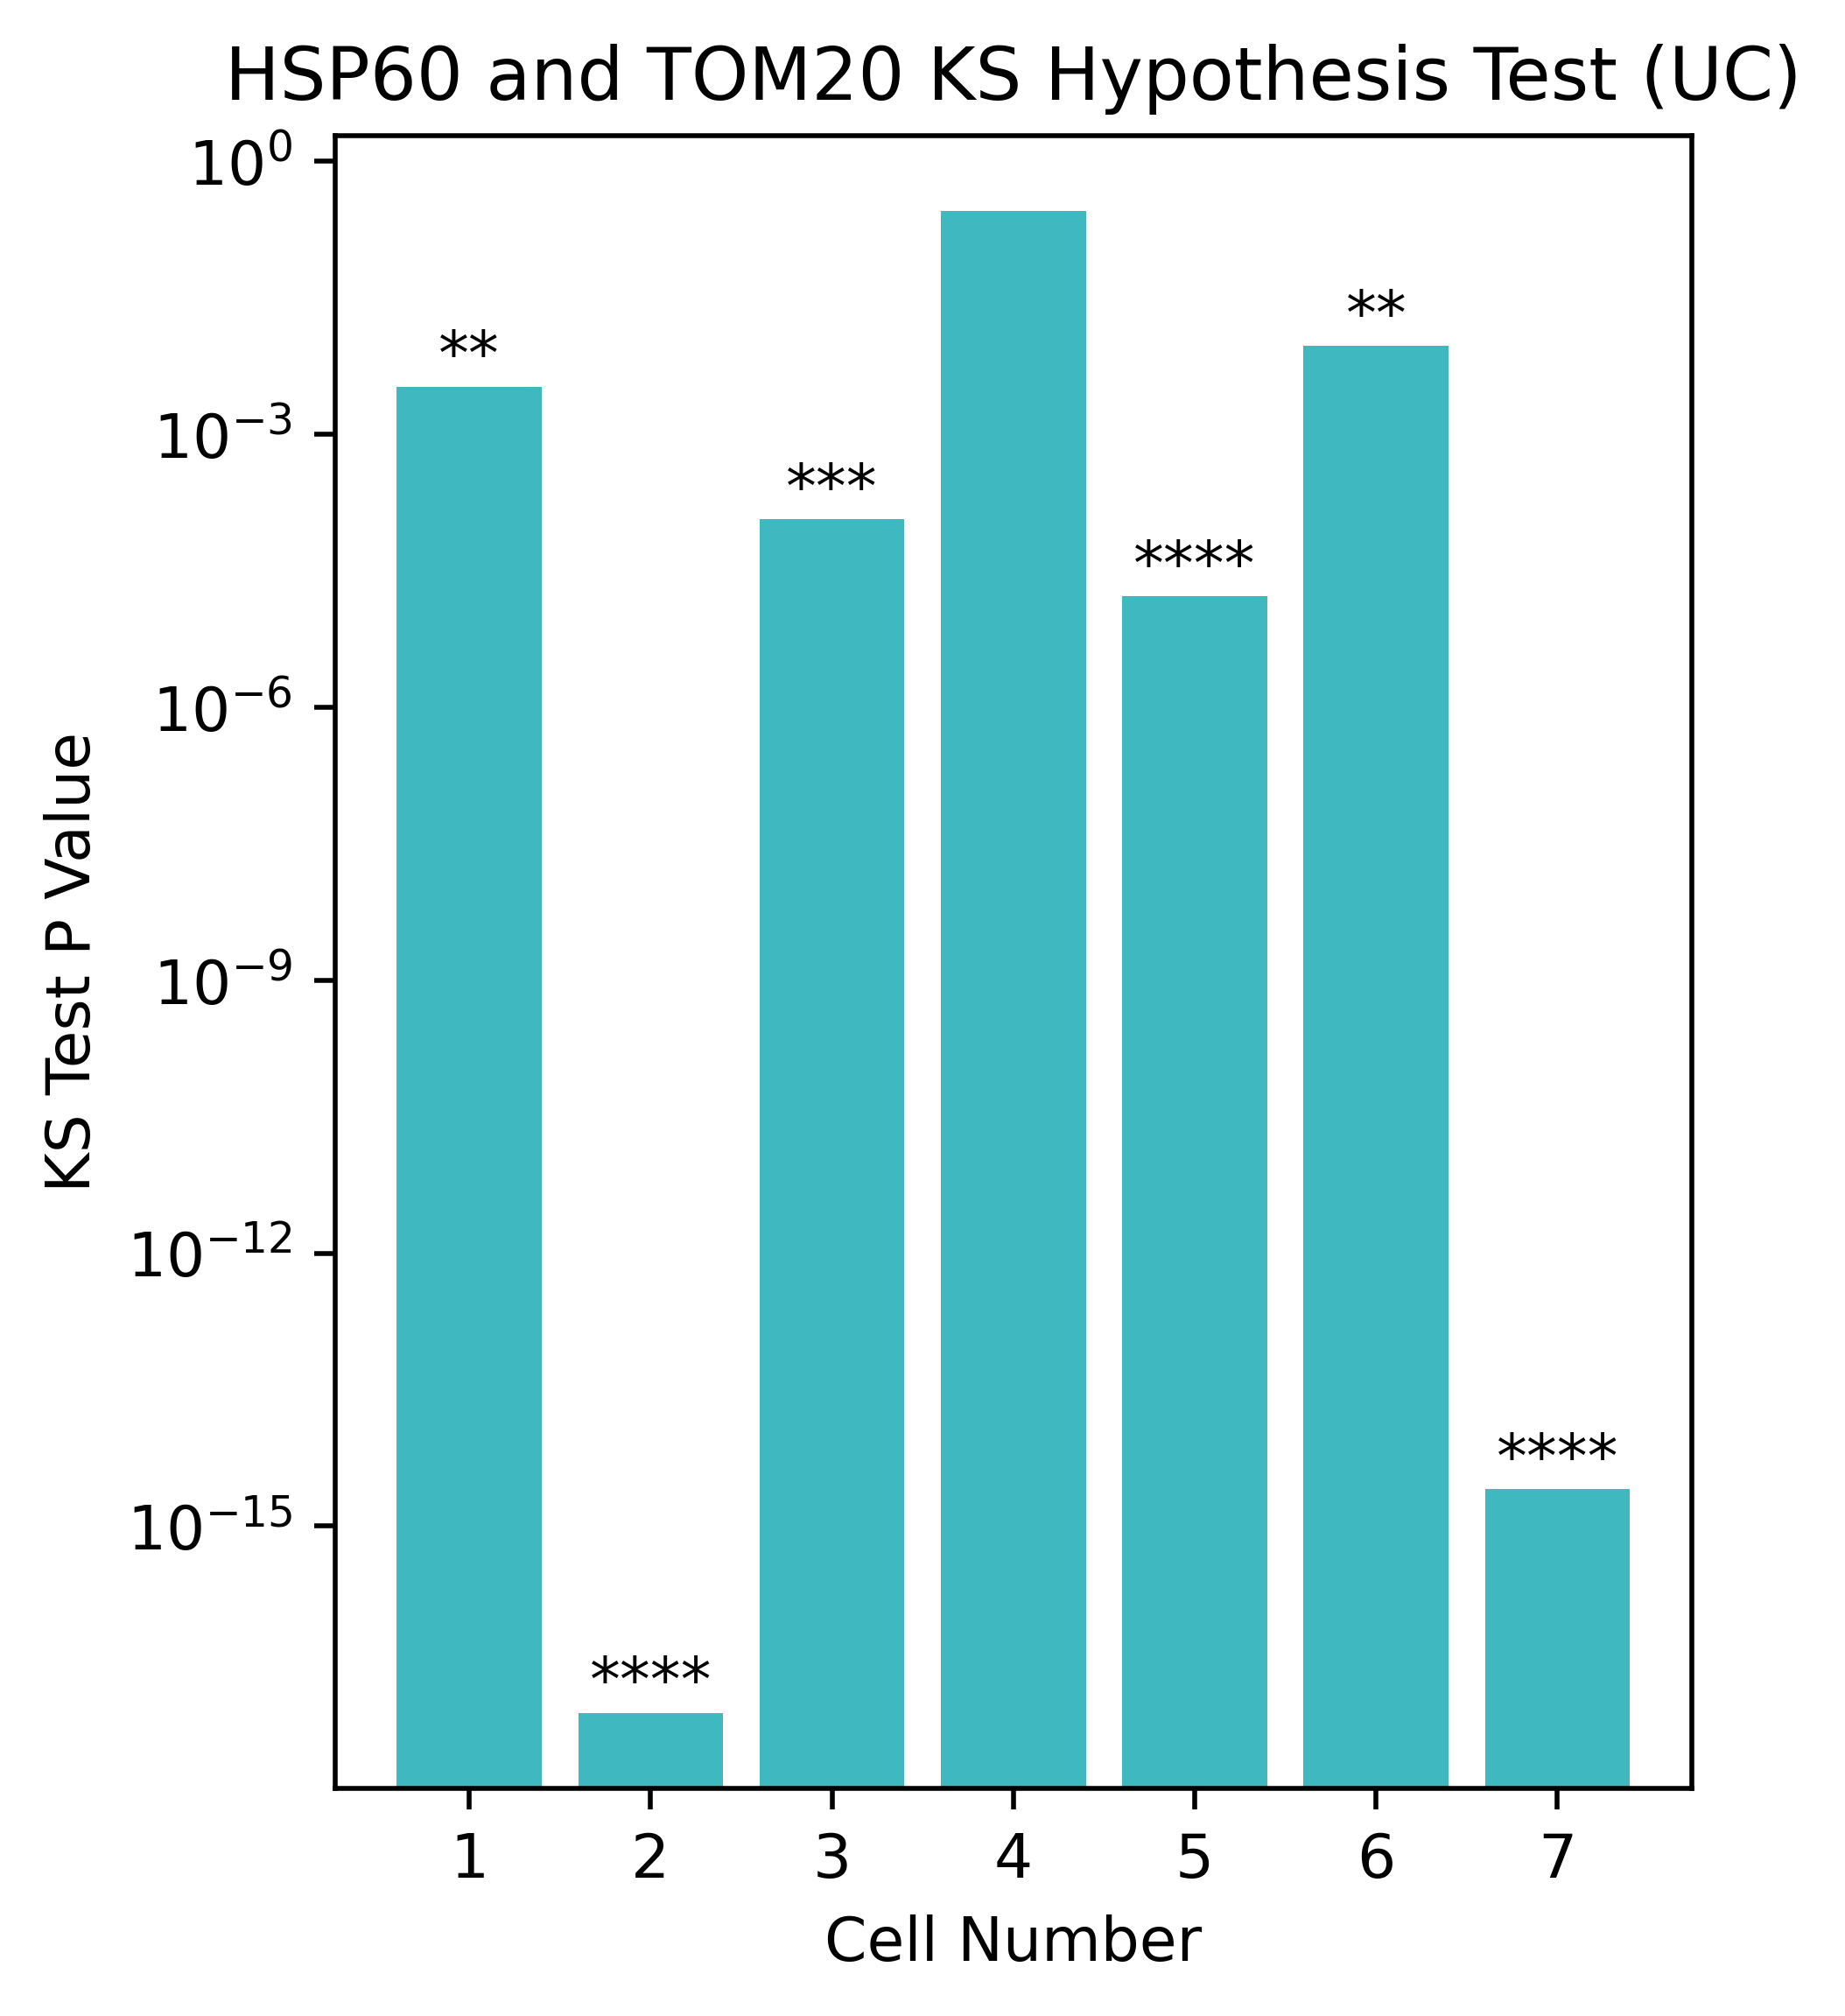

In [13]:
# calculate pairwise markers: HSP60, Tom20
# should be insignificant bc both target mitochondria
centerPVal = {}
centerPVal['BM'] = []
centerPVal['UC'] = []
sigLabels = {}
sigLabels['BM'] = []
sigLabels['UC'] = []

nCells = np.max(images_all_BM['cell'].values)

for c in trange(nCells + 1): # every cell
    
    # test pairwise HSP60 and Tom20 for BM
    dfCell = images_all_BM.loc[images_all_BM['cell'] == c]
    
    # find distance distributions for g4 and sor
    d1 = dfCell.loc[dfCell['HSP60'] > 0] # positive signal
    d1 = d1['DistCenter'].values
    
    d2 = dfCell.loc[dfCell['TOM20'] > 0]
    d2 = d2['DistCenter'].values
    
    _, pVal = scipy.stats.ks_2samp(d1, d2)
    
    if pVal < 0.05 and pVal > 0.01: 
        sigLabels['BM'].append('*')
    elif pVal < 0.01 and pVal > 1e-3:
        sigLabels['BM'].append('**')
    elif pVal < 1e-3 and pVal > 1e-4:
        sigLabels['BM'].append('***')
    elif pVal < 1e-4:
        sigLabels['BM'].append('****')
    else: # insignificant
        sigLabels['BM'].append('')

    centerPVal['BM'].append(pVal)
    
    # test pairwise HSP60 and Tom20 for UC
    dfCell = images_all_UC.loc[images_all_UC['cell'] == c]
    
    # find distance distributions for g4 and sor
    d1 = dfCell.loc[dfCell['HSP60'] > 0] # positive signal
    d1 = d1['DistCenter'].values
    
    d2 = dfCell.loc[dfCell['TOM20'] > 0]
    d2 = d2['DistCenter'].values
    
    _, pVal = scipy.stats.ks_2samp(d1, d2)
    
    if pVal < 0.05 and pVal > 0.01: 
        sigLabels['UC'].append('*')
    elif pVal < 0.01 and pVal > 1e-3:
        sigLabels['UC'].append('**')
    elif pVal < 1e-3 and pVal > 1e-4:
        sigLabels['UC'].append('***')
    elif pVal < 1e-4:
        sigLabels['UC'].append('****')
    else: # insignificant
        sigLabels['UC'].append('')

    centerPVal['UC'].append(pVal)

if not os.path.exists(f"{data_figure}/ksTest/"):
    os.makedirs(f"{data_figure}/ksTest/")

# visualize p values on 2 separate bar graphs
fig, ax = plt.subplots(dpi = 500, figsize=(4,5))
# grouped bar graph
x = np.arange(1, nCells + 2)  # the label locations
width = 0.35  # the width of the bars

colors = sns.hls_palette(2, l=0.5, s=0.5)

# plot separately bc yscale doesn't show everything even on log
rects1 = ax.bar(x, centerPVal['BM'], label = 'BM', color = colors[0])
ax.set_xlabel('Cell Number')
ax.set_ylabel('KS Test P Value')
ax.set_title('HSP60 and TOM20 KS Hypothesis Test (BM)')
ax.set_yscale('log')
ax.set_xticks([1,2,3,4,5,6,7])
# add significance stars
add_value_labels(ax = ax, label = sigLabels['BM'], spacing = 0)
image_path_png = f"{data_figure}/ksTest/hsp60_tom20_BM.png"
plt.savefig(image_path_png, bbox_inches="tight")

fig, ax = plt.subplots(dpi = 500, figsize=(4,5))
ax.bar(x, centerPVal['UC'], label = 'UC', color = colors[1])
ax.set_xlabel('Cell Number')
ax.set_ylabel('KS Test P Value')
ax.set_title('HSP60 and TOM20 KS Hypothesis Test (UC)')
ax.set_yscale('log')
ax.set_xticks([1,2,3,4,5,6,7])
# add significance stars
add_value_labels(ax = ax, label = sigLabels['UC'], spacing = 0)
image_path_png = save_path+"/hsp60_tom20_UC.png"
plt.savefig(image_path_png, bbox_inches="tight")


100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:16<00:00,  2.35s/it]


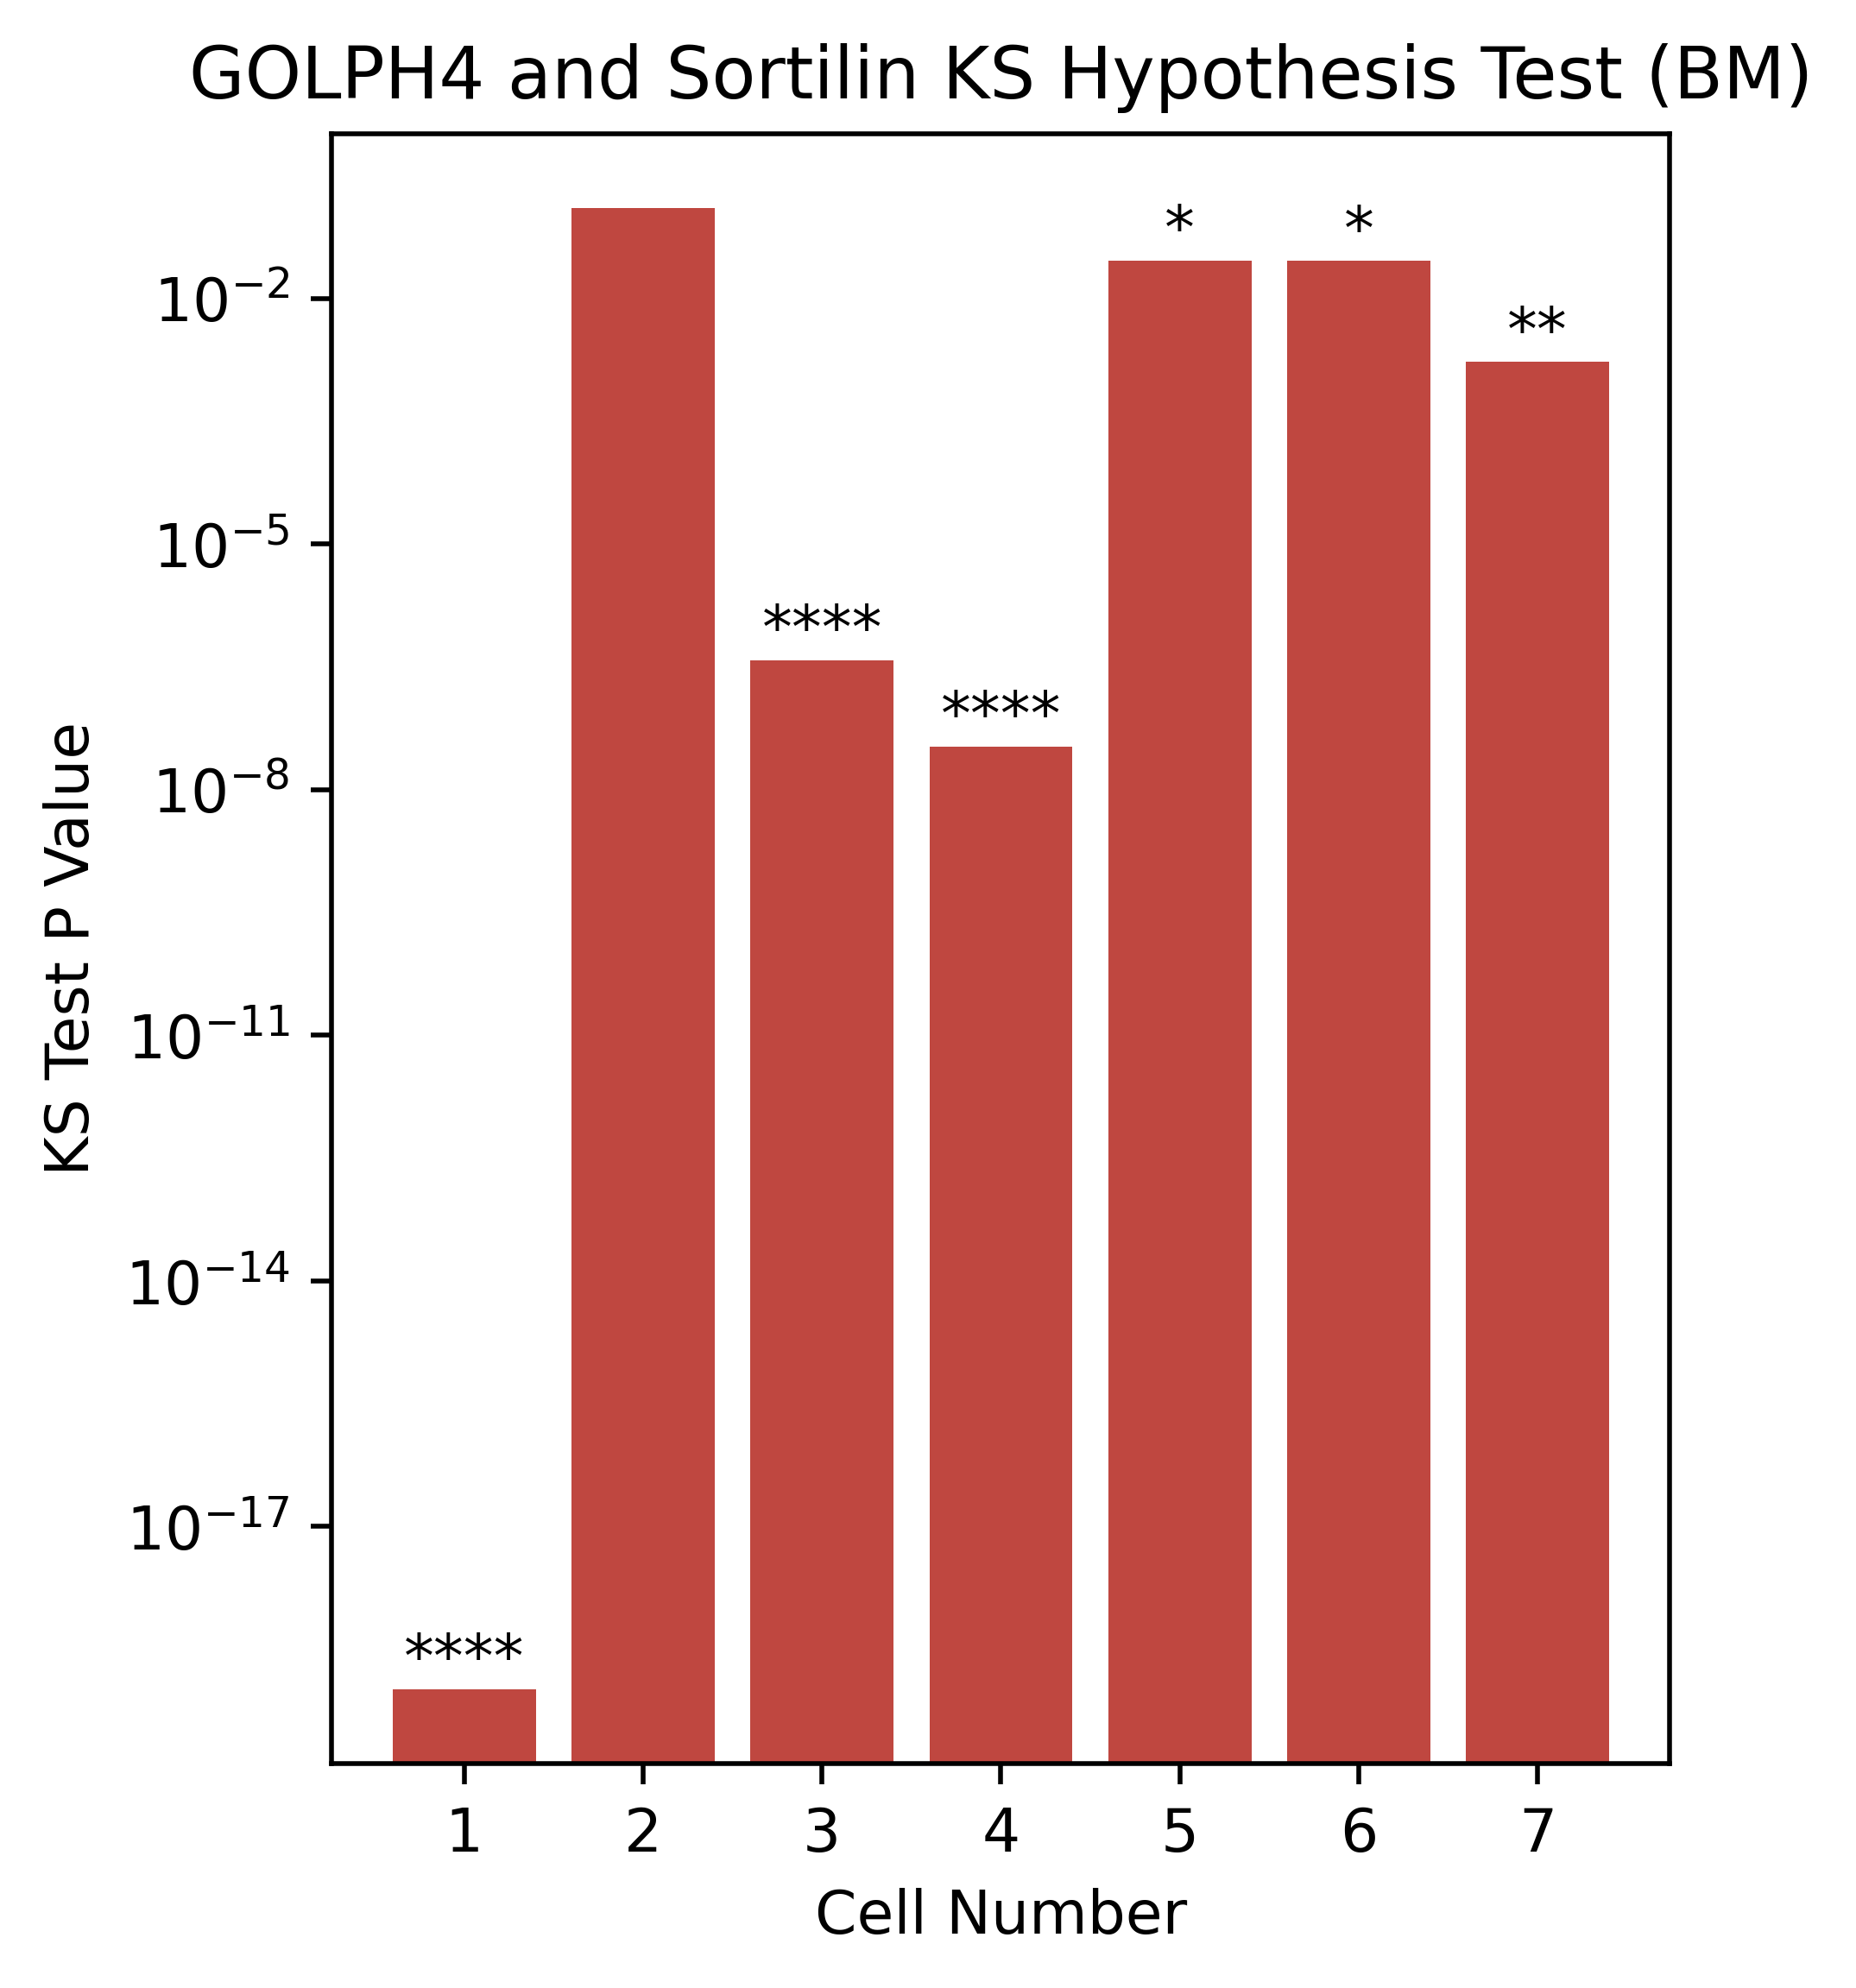

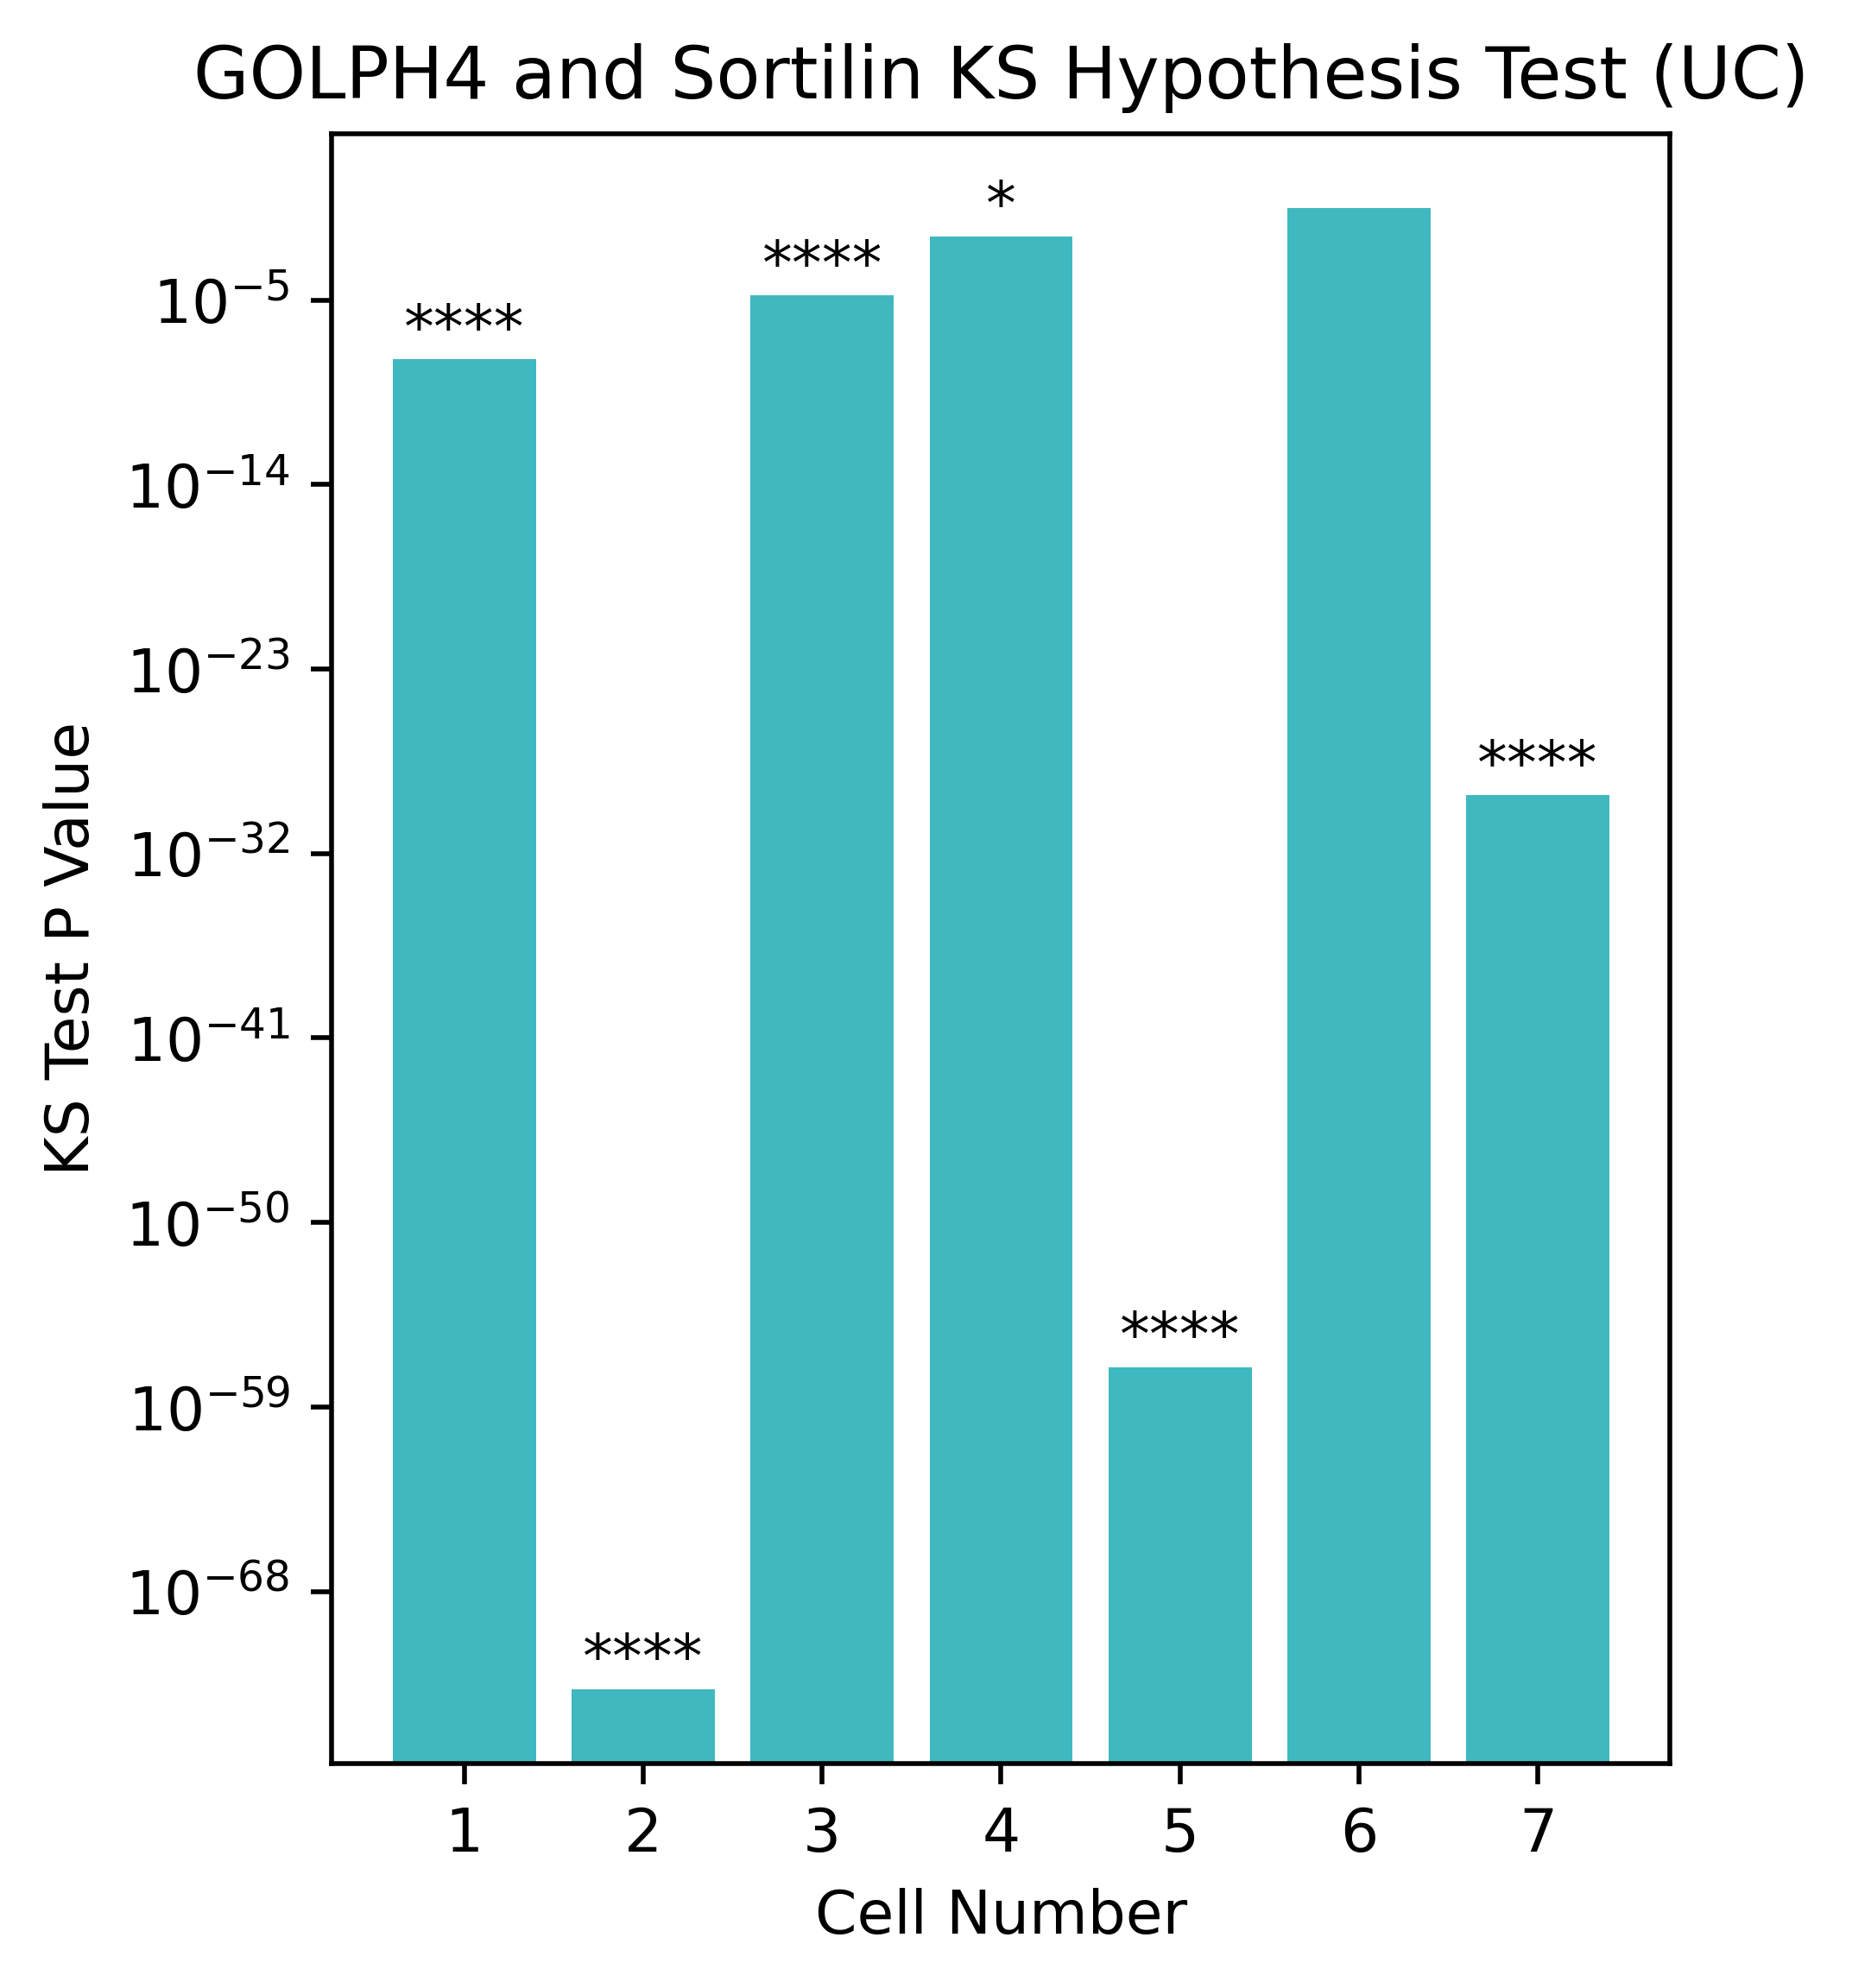

In [14]:
# calculate pairwise markers: GOLPH4, Sortilin
# should be insignificant bc both target golgi
centerPVal = {} # for BM and UC
centerPVal['BM'] = []
centerPVal['UC'] = []
sigLabels = {} # for BM and UC
sigLabels['BM'] = []
sigLabels['UC'] = []
for c in trange(nCells + 1): # every cell
    
    # test pairwise g4 and sor
    dfCell = images_all_BM.loc[images_all_BM['cell'] == c]
    
    # find distance distributions for g4 and sor
    d1 = dfCell.loc[dfCell['GOLPH4'] > 0] # positive signal
    d1 = d1['DistCenter'].values
    
    d2 = dfCell.loc[dfCell['Sortilin'] > 0]
    d2 = d2['DistCenter'].values
    
    _, pVal = scipy.stats.ks_2samp(d1, d2)
    
    if pVal < 0.05 and pVal > 0.01: 
        sigLabels['BM'].append('*')
    elif pVal < 0.01 and pVal > 1e-3:
        sigLabels['BM'].append('**')
    elif pVal < 1e-3 and pVal > 1e-4:
        sigLabels['BM'].append('***')
    elif pVal < 1e-4:
        sigLabels['BM'].append('****')
    else: # insignificant
        sigLabels['BM'].append('')

    centerPVal['BM'].append(pVal)
    
    # repeat for UC
    dfCell = images_all_UC.loc[images_all_UC['cell'] == c]
    
    # find distance distributions for g4 and sor
    d1 = dfCell.loc[dfCell['GOLPH4'] > 0] # positive signal
    d1 = d1['DistCenter'].values
    
    d2 = dfCell.loc[dfCell['Sortilin'] > 0]
    d2 = d2['DistCenter'].values
    
    _, pVal = scipy.stats.ks_2samp(d1, d2)
    
    if pVal < 0.05 and pVal > 0.01: 
        sigLabels['UC'].append('*')
    elif pVal < 0.01 and pVal > 1e-3:
        sigLabels['UC'].append('**')
    elif pVal < 1e-3 and pVal > 1e-4:
        sigLabels['UC'].append('***')
    elif pVal < 1e-4:
        sigLabels['UC'].append('****')
    else: # insignificant
        sigLabels['UC'].append('')

    centerPVal['UC'].append(pVal)

if not os.path.exists(f"{data_figure}/ksTest/"):
    os.makedirs(f"{data_figure}/ksTest/")

fig, ax = plt.subplots(dpi = 500, figsize=(4,5))
# grouped bar graph
x = np.arange(1, nCells + 2)  # the label locations
width = 0.35  # the width of the bars

# plot separately bc yscale doesn't show everything even on log
colors = sns.hls_palette(2, l=0.5, s=0.5)
rects1 = ax.bar(x, centerPVal['BM'], label = 'BM', color = colors[0])
ax.set_xlabel('Cell Number')
ax.set_ylabel('KS Test P Value')
ax.set_title('GOLPH4 and Sortilin KS Hypothesis Test (BM)')
ax.set_yscale('log')
ax.set_xticks([1,2,3,4,5,6,7])
# add significance stars
add_value_labels(ax = ax, label = sigLabels['BM'], spacing = 0)
image_path_png = f"{data_figure}/ksTest/golph4_sortilin_BM.png"
plt.savefig(image_path_png, bbox_inches="tight")

fig, ax = plt.subplots(dpi = 500, figsize=(4,5))
ax.bar(x, centerPVal['UC'], label = 'UC', color = colors[1])
ax.set_xlabel('Cell Number')
ax.set_ylabel('KS Test P Value')
ax.set_title('GOLPH4 and Sortilin KS Hypothesis Test (UC)')
ax.set_yscale('log')
ax.set_xticks([1,2,3,4,5,6,7])
# add significance stars
add_value_labels(ax = ax, label = sigLabels['UC'], spacing = 0)
image_path_png = save_path+"/golph4_sortilin_UC.png"
plt.savefig(image_path_png, bbox_inches="tight")